In [5]:
import pandas as pd
df = pd.read_csv('rf_dataset.csv')

In [6]:
from sklearn.model_selection import train_test_split
X = df.drop('match_category', axis=1) # Replace 'Your_Target_Column' with the name of the column you want to predict
y = df['match_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 0.2 means 20% for testing

Random Forest model trained successfully after encoding!

--- Model Evaluation ---

Confusion Matrix:
[[145   0]
 [  0 155]]


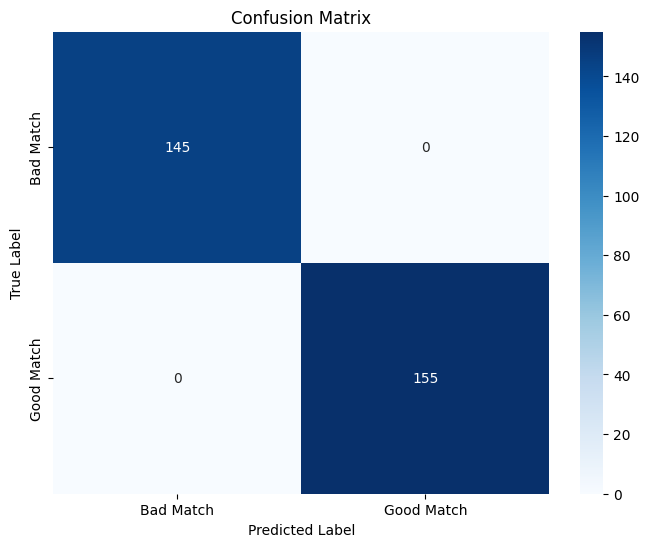


Classification Report:
              precision    recall  f1-score   support

   Bad Match       1.00      1.00      1.00       145
  Good Match       1.00      1.00      1.00       155

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Accuracy: 1.00

--- Hyperparameter Tuning Example (Optional) ---
Best hyperparameters found during tuning: {'classifier__max_depth': 45, 'classifier__min_samples_leaf': 21, 'classifier__min_samples_split': 20, 'classifier__n_estimators': 363}

Accuracy after hyperparameter tuning: 0.97
Classification Report after tuning:
               precision    recall  f1-score   support

   Bad Match       0.97      0.97      0.97       145
  Good Match       0.97      0.97      0.97       155

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the dataset
df = pd.read_csv('rf_dataset.csv')

# 2. Define features (X) and target (y)
# 'match_category' is your target variable
X = df.drop('match_category', axis=1) # All columns except 'match_category' are features
y = df['match_category']             # 'match_category' is the target variable

# 3. Identify categorical and numerical features
# Based on inspection of rf_dataset.csv
categorical_features = ['adopter_id', 'house_type', 'family_composition', 'lifestyle', 'pet_experience', 'dog_size', 'dog_behavior', 'health_condition']
numerical_features = ['dog_id', 'dog_age'] # Although not explicitly used in preprocessor, good to list

# 4. Create a preprocessor for One-Hot Encoding categorical features
# 'remainder="passthrough"' ensures that numerical columns are kept as they are.
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# 5. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Apply Label Encoding to the target variable (y)
# RandomForestClassifier in scikit-learn works best with numerical labels for y
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# 7. Create a pipeline for preprocessing and model training
# This ensures that encoding is applied consistently to both training and test data
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# 8. Train the Random Forest model with the pipeline
model_pipeline.fit(X_train, y_train_encoded) # Use original X_train, pipeline handles encoding

print("Random Forest model trained successfully after encoding!")

# 9. Make predictions
y_pred_encoded = model_pipeline.predict(X_test)

# 10. Evaluate the model (Confusion Matrix, Metrics of Evaluation, Performance Metrics)
print("\n--- Model Evaluation ---")

# Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_pred_encoded)
print("\nConfusion Matrix:")
print(cm)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_) # Use original class names for labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report (includes Precision, Recall, F1-Score, Accuracy)
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_encoded, target_names=le.classes_))

# Individual Metrics
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print(f"Accuracy: {accuracy:.2f}")

# You can also perform Hyperparameter Tuning using RandomizedSearchCV or GridSearchCV
# on this pipeline. Here's an example structure for RandomizedSearchCV:
print("\n--- Hyperparameter Tuning Example (Optional) ---")
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'classifier__n_estimators': randint(50, 500),
    'classifier__max_depth': randint(40, 50),
    'classifier__min_samples_split': randint(20, 40),
    'classifier__min_samples_leaf': randint(20, 30)
}


# Use random search on the pipeline
rand_search = RandomizedSearchCV(model_pipeline,
                                 param_distributions=param_dist,
                                 n_iter=10,
                                 cv=5,
                                 random_state=42,
                                 n_jobs=-1)

rand_search.fit(X_train, y_train_encoded)

best_model = rand_search.best_estimator_
print('Best hyperparameters found during tuning:', rand_search.best_params_)

# Evaluate the best model
y_pred_tuned_encoded = best_model.predict(X_test)
print(f"\nAccuracy after hyperparameter tuning: {accuracy_score(y_test_encoded, y_pred_tuned_encoded):.2f}")
print("Classification Report after tuning:\n", classification_report(y_test_encoded, y_pred_tuned_encoded, target_names=le.classes_))